In [1]:
import dask.bag as db

### Reference : https://github.com/jdorfman/awesome-json-datasets

In [2]:
country_bag = db.from_url('http://api.worldbank.org/countries/IND/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json')

In [3]:
country_bag.take(1)

(b'[{"page":1,"pages":1,"per_page":"5000","total":59},[{"indicator":{"id":"NY.GDP.MKTP.CD","value":"GDP (current US$)"},"country":{"id":"IN","value":"India"},"value":null,"decimal":"0","date":"2018"},{"indicator":{"id":"NY.GDP.MKTP.CD","value":"GDP (current US$)"},"country":{"id":"IN","value":"India"},"value":"2650725335363.83","decimal":"0","date":"2017"},{"indicator":{"id":"NY.GDP.MKTP.CD","value":"GDP (current US$)"},"country":{"id":"IN","value":"India"},"value":"2290432075123.55","decimal":"0","date":"2016"},{"indicator":{"id":"NY.GDP.MKTP.CD","value":"GDP (current US$)"},"country":{"id":"IN","value":"India"},"value":"2103587813812.2","decimal":"0","date":"2015"},{"indicator":{"id":"NY.GDP.MKTP.CD","value":"GDP (current US$)"},"country":{"id":"IN","value":"India"},"value":"2039127446299.3","decimal":"0","date":"2014"},{"indicator":{"id":"NY.GDP.MKTP.CD","value":"GDP (current US$)"},"country":{"id":"IN","value":"India"},"value":"1856722121394.42","decimal":"0","date":"2013"},{"indic

In [4]:
import json
json_bag = country_bag.map(json.loads)

In [5]:
json_bag.take(1)


([{'page': 1, 'pages': 1, 'per_page': '5000', 'total': 59},
  [{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'value': None,
    'decimal': '0',
    'date': '2018'},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'value': '2650725335363.83',
    'decimal': '0',
    'date': '2017'},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'value': '2290432075123.55',
    'decimal': '0',
    'date': '2016'},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'value': '2103587813812.2',
    'decimal': '0',
    'date': '2015'},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'value': '2039127446299.3',
    'decimal': '0',
    'da

In [6]:
len(json_bag.compute())

1

In [35]:
url_prefix = 'http://api.worldbank.org/countries/'
url_suffix = '/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json'

country_codes = ['IN', 'US', 'GBR', 'CN', 'DK',
                'SE', 'SG', 'CA', 'RU', 'FR',
                'JP', 'DE', 'IT']

In [36]:
url_lists = []
for code in country_codes:
    full_url = url_prefix + code + url_suffix
    url_lists.append(full_url)


In [37]:
print(url_lists)

['http://api.worldbank.org/countries/IN/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/GBR/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/DK/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/SE/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/SG/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/CA/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/RU/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/FR/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/JP/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/DE/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/IT/indicators/NY.GDP.MKTP.CD?per

In [38]:
all_countries = db.from_url(url_lists)

In [39]:
all_countries.npartitions

11

In [40]:
json_countries = all_countries.map(json.loads)

In [41]:
json_countries.take(2,npartitions=2)

([{'page': 1, 'pages': 1, 'per_page': '5000', 'total': 59},
  [{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'value': None,
    'decimal': '0',
    'date': '2018'},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'value': '2650725335363.83',
    'decimal': '0',
    'date': '2017'},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'value': '2290432075123.55',
    'decimal': '0',
    'date': '2016'},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'value': '2103587813812.2',
    'decimal': '0',
    'date': '2015'},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'value': '2039127446299.3',
    'decimal': '0',
    'da

In [42]:
country_names = json_countries.pluck('country')

In [43]:
country_names.take(1)

TypeError: list indices must be integers or slices, not str

In [44]:
def correct_json(json_str):
    json_format = json.loads(json_str)
    return json_format[1]

proper_json = all_countries.map(correct_json).flatten()

In [45]:
proper_json.take(10)

({'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'IN', 'value': 'India'},
  'value': None,
  'decimal': '0',
  'date': '2018'},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'IN', 'value': 'India'},
  'value': '2650725335363.83',
  'decimal': '0',
  'date': '2017'},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'IN', 'value': 'India'},
  'value': '2290432075123.55',
  'decimal': '0',
  'date': '2016'},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'IN', 'value': 'India'},
  'value': '2103587813812.2',
  'decimal': '0',
  'date': '2015'},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'IN', 'value': 'India'},
  'value': '2039127446299.3',
  'decimal': '0',
  'date': '2014'},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'IN',

In [46]:
country_names = proper_json.pluck('country', default=None)

In [47]:
country_names.take(4)

({'id': 'IN', 'value': 'India'},
 {'id': 'IN', 'value': 'India'},
 {'id': 'IN', 'value': 'India'},
 {'id': 'IN', 'value': 'India'})

In [48]:
country_names = proper_json.pluck('country',
                                  default=None).pluck('value')

In [49]:
country_names.distinct().compute()

['Russian Federation',
 'Canada',
 'France',
 'United Kingdom',
 'Germany',
 'India',
 'Denmark',
 'Italy',
 'Singapore',
 'Japan',
 'Sweden']

In [50]:
country_list = country_names.distinct()

In [51]:
proper_json.npartitions

11

In [52]:
def combine_country(x):
    total = 0
    for yearly_gdp in x:
        if yearly_gdp['value'] is not None:
            total += float(yearly_gdp['value'])
    return total
    
test = proper_json.map_partitions(combine_country).compute()
test

(31959538290806.188,
 67549446525206.75,
 8076908177654.809,
 13028614014428.967,
 4665279438258.042,
 36788572381237.69,
 27288200306459.336,
 68236494341034.71,
 156887321372099.4,
 93186857328936.03,
 54789746463502.6)

In [53]:
def imp_columns(my_item):
    if my_item['value'] is None:
        return None
    else:
        result_dict = {
            'country': my_item['country']['value'],
            'gdp': float(my_item['value']),
            'year': int(my_item['date'])
        }
        return result_dict

filtered_bag = proper_json.map(imp_columns)
                

In [54]:
filtered_bag.take(10)

(None,
 {'country': 'India', 'gdp': 2650725335363.83, 'year': 2017},
 {'country': 'India', 'gdp': 2290432075123.55, 'year': 2016},
 {'country': 'India', 'gdp': 2103587813812.2, 'year': 2015},
 {'country': 'India', 'gdp': 2039127446299.3, 'year': 2014},
 {'country': 'India', 'gdp': 1856722121394.42, 'year': 2013},
 {'country': 'India', 'gdp': 1827637859136.23, 'year': 2012},
 {'country': 'India', 'gdp': 1823049927772.05, 'year': 2011},
 {'country': 'India', 'gdp': 1675615312693.42, 'year': 2010},
 {'country': 'India', 'gdp': 1341886699393.18, 'year': 2009})

In [55]:
filtered_bag = filtered_bag.filter(lambda x: x is not None)

In [56]:
filtered_bag.take(10)

({'country': 'India', 'gdp': 2650725335363.83, 'year': 2017},
 {'country': 'India', 'gdp': 2290432075123.55, 'year': 2016},
 {'country': 'India', 'gdp': 2103587813812.2, 'year': 2015},
 {'country': 'India', 'gdp': 2039127446299.3, 'year': 2014},
 {'country': 'India', 'gdp': 1856722121394.42, 'year': 2013},
 {'country': 'India', 'gdp': 1827637859136.23, 'year': 2012},
 {'country': 'India', 'gdp': 1823049927772.05, 'year': 2011},
 {'country': 'India', 'gdp': 1675615312693.42, 'year': 2010},
 {'country': 'India', 'gdp': 1341886699393.18, 'year': 2009},
 {'country': 'India', 'gdp': 1198895498504.14, 'year': 2008})

In [57]:
gdp_data = filtered_bag.to_dataframe().compute()

In [58]:
import seaborn as sns

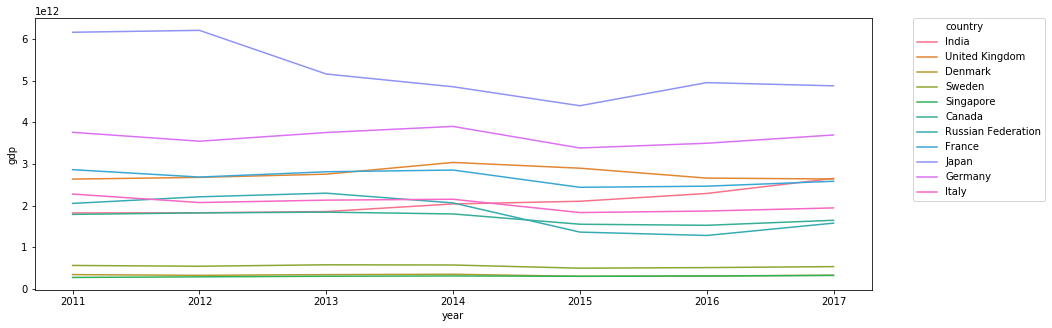

In [59]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (15,5))
sns.lineplot(data=gdp_data[gdp_data['year']>2010], x='year', y='gdp',
            hue='country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
